<a href="https://colab.research.google.com/github/firecold944/chest-xray-classification/blob/main/chest-xray-classification_ethan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

je vais importer le dataset sur la pneunomie\texte en italique

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/5 | Loss 80.9827 | Accuracy 78.03%
Epoch 2/5 | Loss 66.5431 | Accuracy 82.32%
Epoch 3/5 | Loss 61.6219 | Accuracy 83.51%
Epoch 4/5 | Loss 55.5772 | Accuracy 85.64%
Epoch 5/5 | Loss 56.3704 | Accuracy 84.91%
Test Accuracy 82.69%
Prediction: NORMAL


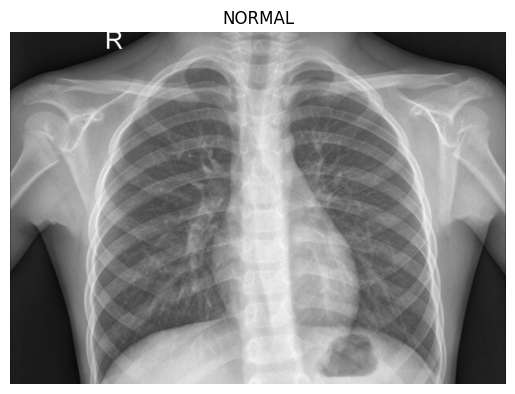

In [13]:
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import os

path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(
    os.path.join(path, "chest_xray/train"),
    transform=train_transforms
)

test_data = datasets.ImageFolder(
    os.path.join(path, "chest_xray/test"),
    transform=test_transforms
)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 28 * 28, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 2)
        )

    def forward(self, x):
        return self.classifier(self.features(x))

model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

epochs = 5
for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    loss_sum = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_sum += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    print(f"Epoch {epoch+1}/{epochs} | Loss {loss_sum:.4f} | Accuracy {(correct/total)*100:.2f}%")

torch.save(model.state_dict(), "pneumonia_model.pth")

model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

print(f"Test Accuracy {(test_correct/test_total)*100:.2f}%")

image_path = os.path.join(path, "chest_xray/test/NORMAL/IM-0001-0001.jpeg")
image = Image.open(image_path).convert("RGB")
image_tensor = test_transforms(image).unsqueeze(0).to(device)

with torch.no_grad():
    output = model(image_tensor)
    _, prediction = torch.max(output, 1)

class_names = train_data.classes
print("Prediction:", class_names[prediction.item()])

plt.imshow(image)
plt.title(class_names[prediction.item()])
plt.axis("off")
plt.show()


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1/8 | Train Acc: 96.41% | Val Acc: 98.08%
Epoch 2/8 | Train Acc: 99.01% | Val Acc: 97.96%
Epoch 3/8 | Train Acc: 99.32% | Val Acc: 98.34%
Epoch 4/8 | Train Acc: 99.75% | Val Acc: 98.47%
Epoch 5/8 | Train Acc: 99.89% | Val Acc: 98.08%
Epoch 6/8 | Train Acc: 99.86% | Val Acc: 98.47%
Epoch 7/8 | Train Acc: 99.95% | Val Acc: 98.21%
Epoch 8/8 | Train Acc: 100.00% | Val Acc: 98.85%
Test Accuracy: 84.46%


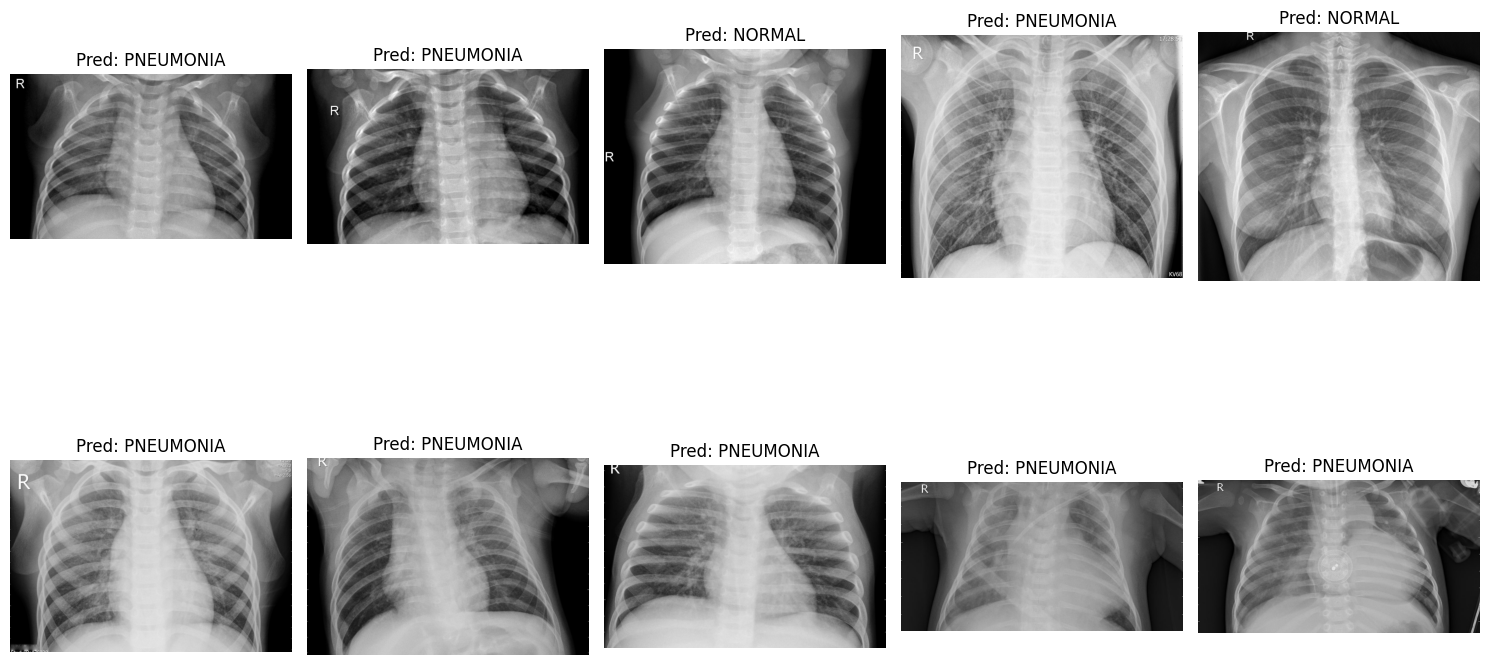

In [17]:
import kagglehub
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

full_train_data = datasets.ImageFolder(
    os.path.join(path, "chest_xray/train"),
    transform=train_transforms
)

test_data = datasets.ImageFolder(
    os.path.join(path, "chest_xray/test"),
    transform=test_transforms
)


train_size = int(0.85 * len(full_train_data))
val_size = len(full_train_data) - train_size
train_data, val_data = random_split(full_train_data, [train_size, val_size])

val_data.dataset.transform = test_transforms


targets = [full_train_data.targets[i] for i in train_data.indices]
class_counts = np.bincount(targets)
class_weights = 1.0 / class_counts
sample_weights = [class_weights[t] for t in targets]

sampler = WeightedRandomSampler(
    weights=sample_weights,
    num_samples=len(sample_weights),
    replacement=True
)


train_loader = DataLoader(
    train_data,
    batch_size=32,
    sampler=sampler,
    num_workers=4,
    pin_memory=True
)

val_loader = DataLoader(
    val_data,
    batch_size=32,
    shuffle=False,
    num_workers=4
)

test_loader = DataLoader(
    test_data,
    batch_size=32,
    shuffle=False,
    num_workers=4
)

# ========================
# MODEL (TRANSFER LEARNING)
# ========================
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, 2)
model = model.to(device)

# ========================
# LOSS & OPTIMIZER
# ========================
criterion = nn.CrossEntropyLoss(
    weight=torch.tensor(class_weights, dtype=torch.float).to(device)
)

optimizer = optim.Adam(model.parameters(), lr=1e-4)

# ========================
# TRAINING LOOP
# ========================
epochs = 8
best_val_acc = 0.0

for epoch in range(epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds = outputs.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_acc = correct / total

    # ========================
    # VALIDATION
    # ========================
    model.eval()
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(dim=1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total

    print(
        f"Epoch {epoch+1}/{epochs} | "
        f"Train Acc: {train_acc*100:.2f}% | "
        f"Val Acc: {val_acc*100:.2f}%"
    )

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_pneumonia_model.pth")

# ========================
# TEST EVALUATION
# ========================
model.load_state_dict(torch.load("best_pneumonia_model.pth"))
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)

print(f"Test Accuracy: {100 * test_correct / test_total:.2f}%")


class_names = test_data.classes

# Get some image paths for prediction (5 NORMAL, 5 PNEUMONIA)
normal_dir = os.path.join(path, "chest_xray/test/NORMAL")
pneumonia_dir = os.path.join(path, "chest_xray/test/PNEUMONIA")

normal_images = [os.path.join(normal_dir, f) for f in os.listdir(normal_dir) if f.endswith('.jpeg')][:5]
pneumonia_images = [os.path.join(pneumonia_dir, f) for f in os.listdir(pneumonia_dir) if f.endswith('.jpeg')][:5]

selected_image_paths = normal_images + pneumonia_images

plt.figure(figsize=(15, 10))
for i, image_path in enumerate(selected_image_paths):
    image = Image.open(image_path).convert("RGB")
    image_tensor = test_transforms(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        prediction = output.argmax(dim=1)

    plt.subplot(2, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Pred: {class_names[prediction.item()]}")
    plt.axis("off")

plt.tight_layout()
plt.show()